In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from keras import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import cross_val_score

In [2]:
file_path = './data/new/SPIROMODEL_MEDICAIDCOMMERCIAL_ITERATION3.csv'  # Update to the correct file path
df = pd.read_csv(file_path)

In [3]:
df.set_index('CENSEOID', inplace=True)
df.drop(['CLIENTID', 'CLIENT'], axis=1, inplace=True)

In [4]:
print(df['V28HCCCODED'].value_counts())

0    19905183
1      486604
Name: V28HCCCODED, dtype: int64


In [5]:
if df['V28HCCCODED'].nunique() <= 1:
    raise ValueError(
        "The dataset contains only one class. Add more diverse samples.")

In [6]:
X = df.drop('V28HCCCODED', axis=1)
y = df['V28HCCCODED']

In [7]:
age_group_col = 'MEMBERAGEGROUP'
X[age_group_col] = X[age_group_col].astype(str)

In [8]:
numerical_cols = [
    col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [9]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

In [10]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ])

C:\Users\samya\AppData\Local\Temp\ipykernel_35896\1409363210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='MEMBERAGEGROUP', palette='coolwarm')


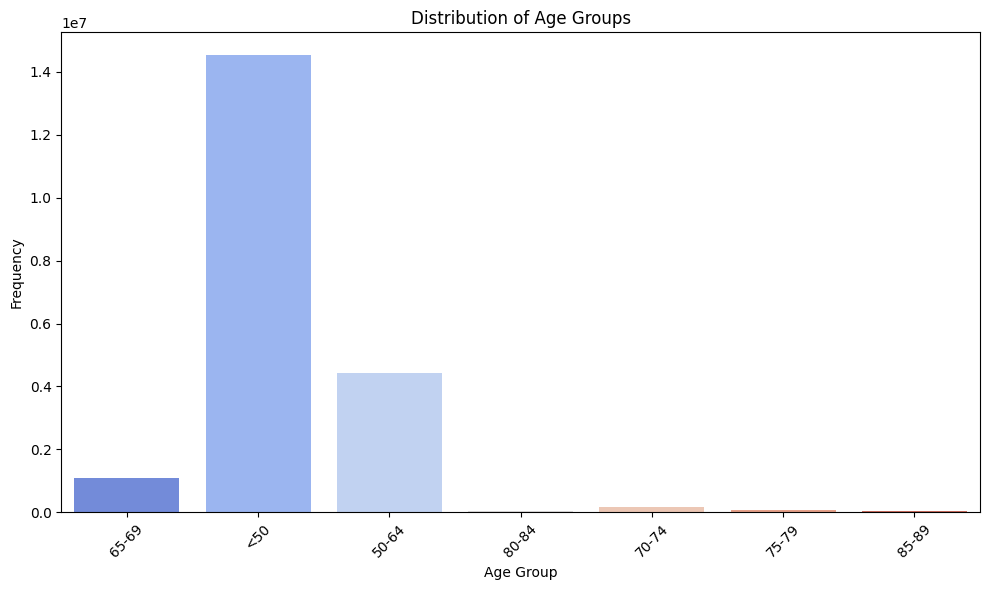

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MEMBERAGEGROUP', palette='coolwarm')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\samya\AppData\Local\Temp\ipykernel_35896\1262842669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='V28HCCCODED', palette='viridis')


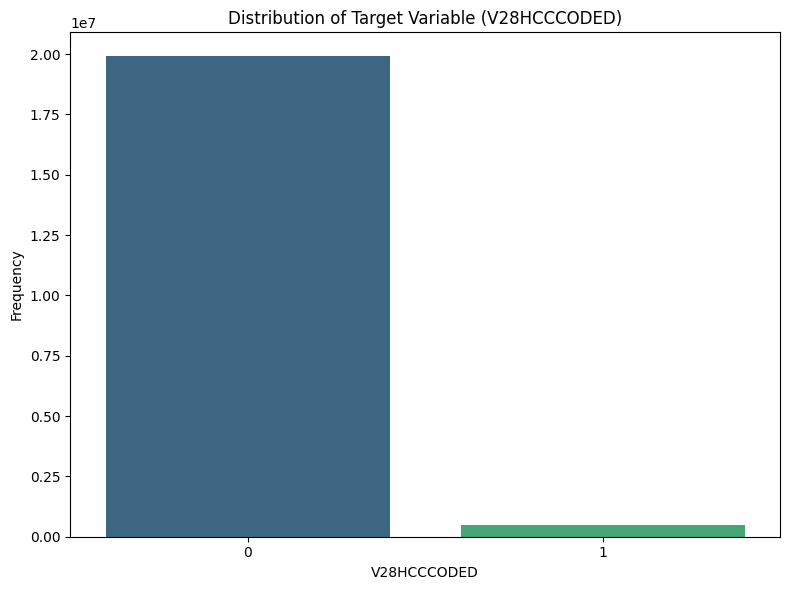

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='V28HCCCODED', palette='viridis')
plt.title('Distribution of Target Variable (V28HCCCODED)')
plt.xlabel('V28HCCCODED')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

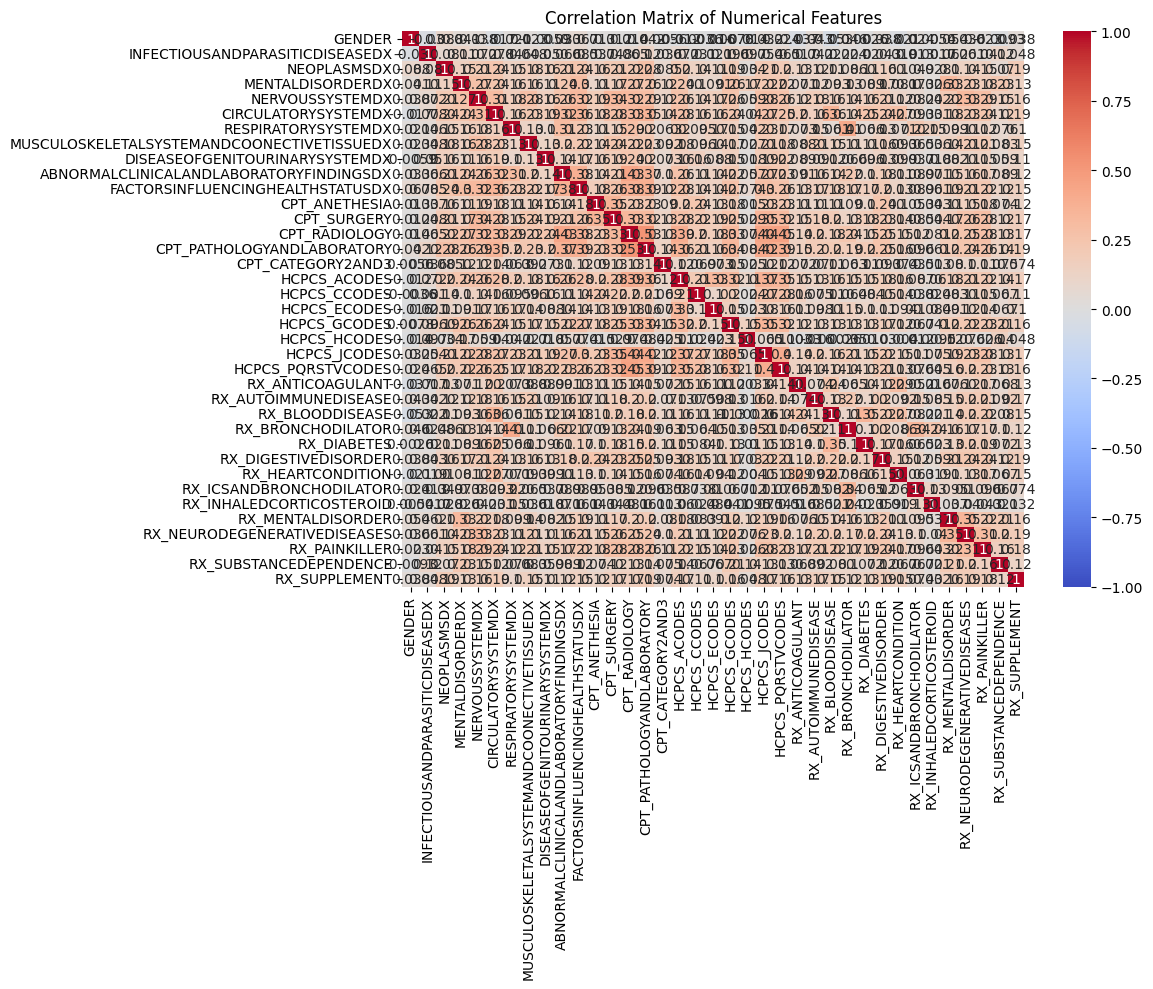

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True,
            cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
model_performances = {}

In [25]:
from keras import Sequential, Input
from keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

X_train_transformed = preprocessor.fit_transform(X_train)
input_shape = X_train_transformed.shape[1]
batch_size = 1024 
def batch_generator(X, y, batch_size):
    num_samples = X.shape[0]
    while True:
        X, y = shuffle(X, y)
        for offset in range(0, num_samples, batch_size):
            X_batch = X[offset:offset+batch_size]
            y_batch = y[offset:offset+batch_size]
            yield X_batch, y_batch

# Define Keras model with dynamic input shape
def build_keras_model():
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Keras Model': KerasClassifier(model=build_keras_model, epochs=10, batch_size=32, verbose=0)
}

MemoryError: Unable to allocate 4.50 GiB for an array with shape (37, 16313429) and data type int64

In [24]:
class PyTorchNN(nn.Module):
    def __init__(self, input_size):
        super(PyTorchNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)
        x = torch.relu(self.layer2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.output(x))
        return x

In [19]:
for model_name, model in models.items():
    print(f'\nTraining {model_name}...')
    
    if model_name == 'Keras Model':
        # Use the batch generator for the Keras model
        steps_per_epoch = len(X_train) // batch_size
        model.fit(
            batch_generator(X_train_transformed, y_train, batch_size),
            steps_per_epoch=steps_per_epoch,
            epochs=10,
            validation_data=(X_test, y_test)
        )
    else:
        # Simulate batch training for non-Keras models
        y_pred_batches = []
        for X_batch, y_batch in batch_generator(X_train_transformed, y_train, batch_size):
            model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
            y_pred_batch = model.predict(X_batch)
            y_pred_batches.extend(y_pred_batch)
            if len(y_pred_batches) >= len(y_test):
                break
        y_pred = np.array(y_pred_batches[:len(y_test)])
    
    # Calculate metrics
    accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    model_performances[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    # Print metrics
    print(f'{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')



Training Logistic Regression...


MemoryError: Unable to allocate 4.50 GiB for an array with shape (37, 16313429) and data type int64

In [71]:
# Ensure preprocessor is applied to both training and test sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert preprocessed data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define and train PyTorch model
print("\nTraining PyTorch Model...")
input_size = X_train_processed.shape[1]
pytorch_model = PyTorchNN(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
pytorch_model.train()
for epoch in range(10):  # Train for 10 epochs
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = pytorch_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

# Evaluation
pytorch_model.eval()
with torch.no_grad():
    y_pred_tensor = pytorch_model(X_test_tensor).round()
    y_pred = y_pred_tensor.numpy()
    accuracy = accuracy_score(y_test_tensor, y_pred)
    precision = precision_score(y_test_tensor, y_pred, average='weighted')
    recall = recall_score(y_test_tensor, y_pred, average='weighted')
    f1 = f1_score(y_test_tensor, y_pred, average='weighted')

    model_performances['PyTorch Model'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    print(f'PyTorch Model - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Display results for all models
print("\nModel Performances:")
for model_name, metrics in model_performances.items():
    print(f"{model_name}: {metrics}")



Training PyTorch Model...
PyTorch Model - Accuracy: 0.9767, Precision: 0.9672, Recall: 0.9767, F1 Score: 0.9666

Model Performances:
Logistic Regression: {'Accuracy': 0.9765122224092584, 'Precision': 0.9657608189105971, 'Recall': 0.9764815747760589, 'F1 Score': 0.9661989886519555}
Random Forest: {'Accuracy': 0.9756950943160791, 'Precision': 0.9626290769519021, 'Recall': 0.9757443200668444, 'F1 Score': 0.9661249247628987}
Neural Network: {'Accuracy': 0.9740424099043459, 'Precision': 0.9650200749874694, 'Recall': 0.9750316405146038, 'F1 Score': 0.9681057489740472}
LightGBM: {'Accuracy': 0.9765521565297719, 'Precision': 0.9665076951394274, 'Recall': 0.9765553002469803, 'F1 Score': 0.9666669597535578}
XGBoost: {'Accuracy': 0.9762050312013144, 'Precision': 0.9667924187752076, 'Recall': 0.9765184375115196, 'F1 Score': 0.9676048770485947}
Keras Model: {'Accuracy': 0.9766320259503619, 'Precision': 0.9676368641314084, 'Recall': 0.9766536008748756, 'F1 Score': 0.9660286445357054}
PyTorch Model:

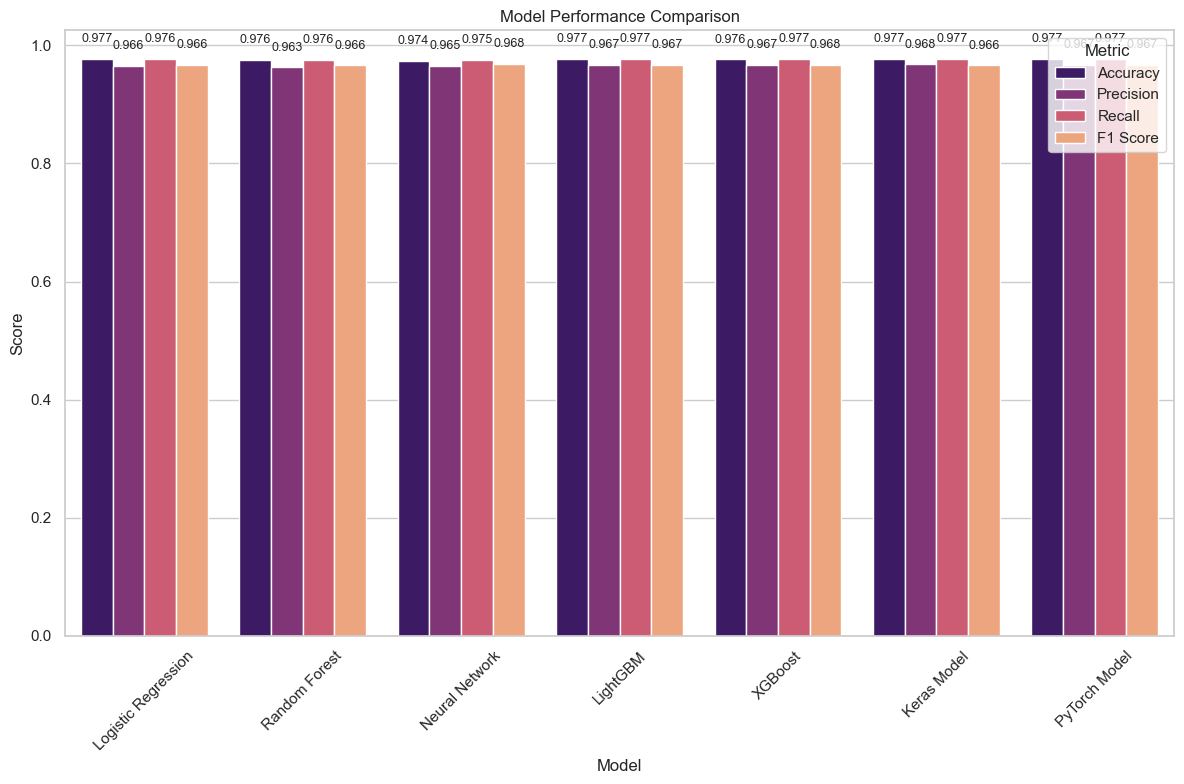

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dictionary into a DataFrame in long format
data = []
for model, metrics in model_performances.items():
    for metric, score in metrics.items():
        data.append({'Model': model, 'Metric': metric, 'Score': score})
df = pd.DataFrame(data)

# Plot the barplot using Seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df, palette='magma')

# Add annotations to show the exact value on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=10, fontsize=9)

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

output_folder = './plots'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
plt.savefig(os.path.join(output_folder, 'model_performance_comparison.png'))
plt.show()
